In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import chi2_contingency

sns.set(style="whitegrid")
pd.set_option("display.max_columns", 200)

DATA_PATH = r"C:\Users\akash\OneDrive\Desktop\automl-brain\data\raw\Chrun.csv"

df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nInfo:")
print(df.info())
print("\nMissing values:\n", df.isna().sum())
print("\nDuplicates:", df.duplicated().sum())

Shape: (7043, 21)

Columns:
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecur

In [5]:
print(df['Churn'].value_counts())
print("Churn %:", (df['Churn']=="Yes").mean()*100)

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn %: 26.536987079369588


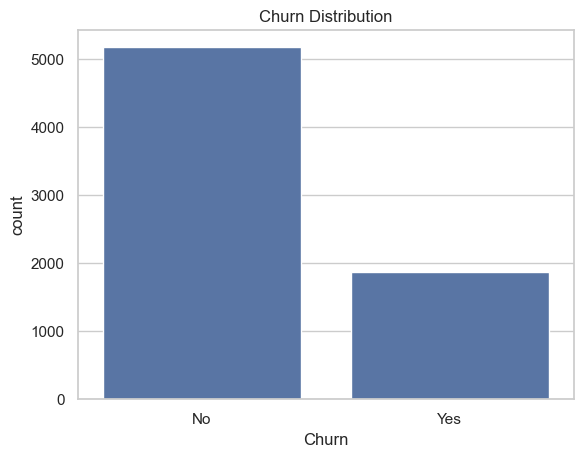

In [6]:
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)

C:\Users\akash\AppData\Local\Temp\ipykernel_19276\3380121502.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [8]:
num_cols = ['tenure','MonthlyCharges','TotalCharges']
print(df[num_cols].describe().T)

                 count         mean          std    min     25%      50%  \
tenure          7043.0    32.371149    24.559481   0.00    9.00    29.00   
MonthlyCharges  7043.0    64.761692    30.090047  18.25   35.50    70.35   
TotalCharges    7043.0  2279.734304  2266.794470   0.00  398.55  1394.55   

                    75%      max  
tenure            55.00    72.00  
MonthlyCharges    89.85   118.75  
TotalCharges    3786.60  8684.80  


In [9]:
print(df.groupby("Churn")[num_cols].mean())

          tenure  MonthlyCharges  TotalCharges
Churn                                         
No     37.569965       61.265124   2549.911442
Yes    17.979133       74.441332   1531.796094


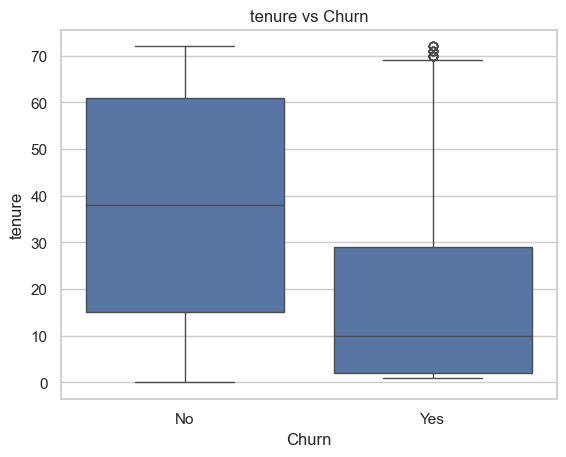

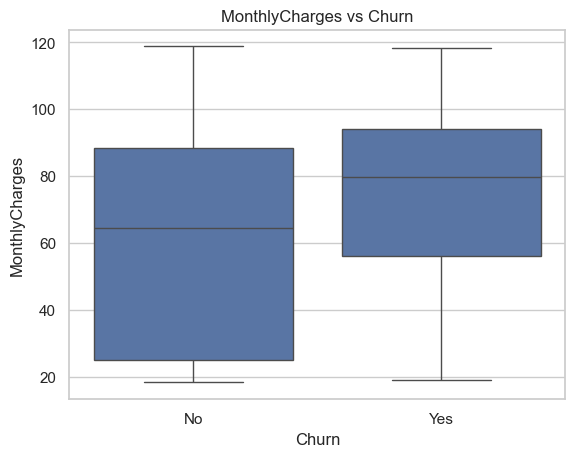

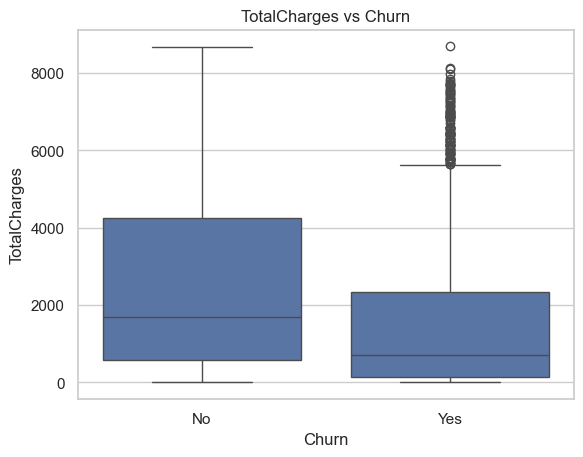

In [10]:
for col in num_cols:
    sns.boxplot(x="Churn", y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()

In [11]:
df['tenure_bucket'] = pd.cut(df['tenure'], bins=[0,12,24,48,72], labels=["0-1y","1-2y","2-4y","4-6y"])

print(df.groupby("tenure_bucket")['Churn'].value_counts(normalize=True))

tenure_bucket  Churn
0-1y           No       0.523218
               Yes      0.476782
1-2y           No       0.712891
               Yes      0.287109
2-4y           No       0.796110
               Yes      0.203890
4-6y           No       0.904868
               Yes      0.095132
Name: proportion, dtype: float64


C:\Users\akash\AppData\Local\Temp\ipykernel_19276\1753292560.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("tenure_bucket")['Churn'].value_counts(normalize=True))


In [12]:
print(df.groupby("Contract")['Churn'].value_counts(normalize=True))

Contract        Churn
Month-to-month  No       0.572903
                Yes      0.427097
One year        No       0.887305
                Yes      0.112695
Two year        No       0.971681
                Yes      0.028319
Name: proportion, dtype: float64


In [13]:
print(df.groupby("PaymentMethod")['Churn'].value_counts(normalize=True))

PaymentMethod              Churn
Bank transfer (automatic)  No       0.832902
                           Yes      0.167098
Credit card (automatic)    No       0.847569
                           Yes      0.152431
Electronic check           No       0.547146
                           Yes      0.452854
Mailed check               No       0.808933
                           Yes      0.191067
Name: proportion, dtype: float64


In [14]:
services = [
    "OnlineSecurity","OnlineBackup",
    "DeviceProtection","TechSupport",
    "StreamingTV","StreamingMovies"
]

for col in services:
    print(f"\nChurn rate by {col}")
    print(df.groupby(col)['Churn'].value_counts(normalize=True))


Churn rate by OnlineSecurity
OnlineSecurity       Churn
No                   No       0.582333
                     Yes      0.417667
No internet service  No       0.925950
                     Yes      0.074050
Yes                  No       0.853888
                     Yes      0.146112
Name: proportion, dtype: float64

Churn rate by OnlineBackup
OnlineBackup         Churn
No                   No       0.600712
                     Yes      0.399288
No internet service  No       0.925950
                     Yes      0.074050
Yes                  No       0.784685
                     Yes      0.215315
Name: proportion, dtype: float64

Churn rate by DeviceProtection
DeviceProtection     Churn
No                   No       0.608724
                     Yes      0.391276
No internet service  No       0.925950
                     Yes      0.074050
Yes                  No       0.774979
                     Yes      0.225021
Name: proportion, dtype: float64

Churn rate by TechSupport
T

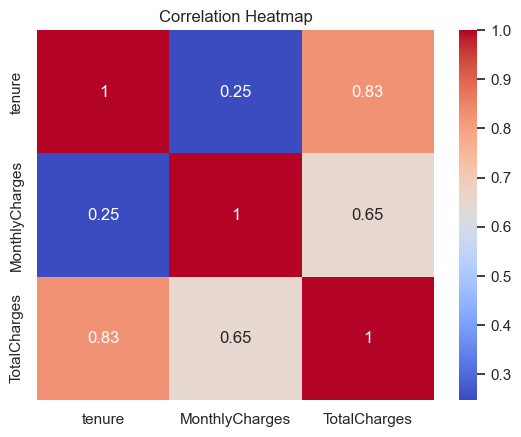

In [15]:
df_num = df[['tenure','MonthlyCharges','TotalCharges']]
sns.heatmap(df_num.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [16]:
from scipy.stats import pointbiserialr

df['Churn_binary'] = (df['Churn']=="Yes").astype(int)

corr_list = []
for col in ['tenure','MonthlyCharges','TotalCharges']:
    corr, _ = pointbiserialr(df[col], df['Churn_binary'])
    corr_list.append((col, corr))

sorted(corr_list, key=lambda x: abs(x[1]), reverse=True)

[('tenure', np.float64(-0.3522286701130779)),
 ('TotalCharges', np.float64(-0.1983242626039956)),
 ('MonthlyCharges', np.float64(0.19335642223784705))]

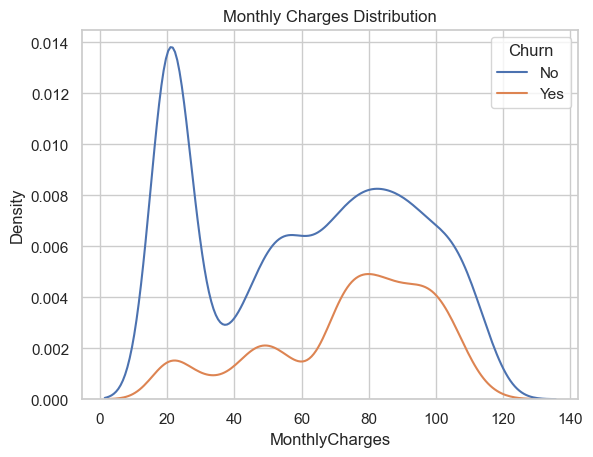

In [17]:
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn")
plt.title("Monthly Charges Distribution")
plt.show()